# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Wisnu Febri Ramadhan
- **Email:** wisnu.febri@lintasarta.co.id
- **ID Dicoding:** wframadhan

### 💡 Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berdasarkan musim?
2. Apakah cuaca memengaruhi jumlah peminjaman sepeda?
3. Bagaimana perbedaan pola peminjaman antara hari kerja dan hari libur?


## Import Semua Packages/Library yang Digunakan
```python

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### 📦 Persiapan

Sebelum memulai proyek ini, pastikan kamu sudah menyiapkan environment kerja seperti Google Colab atau Jupyter Notebook.

Pada proyek ini, kita akan menggunakan dataset *Bike Sharing* yang sudah disediakan dalam bentuk file ZIP (`Bike-sharing-dataset.zip`). Dataset ini berisi informasi tentang peminjaman sepeda harian di Washington, D.C., selama tahun 2011–2012.

Untuk memulai proses analisis, kita akan melakukan **data wrangling**, yaitu:

1. Mengumpulkan data (Gathering)
2. Menilai kualitas data (Assessing)
3. Membersihkan data (Cleaning)

---

### 🗃️ Gathering Data

Dataset yang digunakan berada dalam file ZIP dan perlu diekstrak terlebih dahulu. Setelah itu, kita akan membaca file `day.csv` sebagai data utama.



In [87]:
import zipfile
import os
import pandas as pd

# Upload ZIP file (jika menggunakan Google Colab)
from google.colab import files
uploaded = files.upload()

# Ekstrak isi file
zip_path = "Bike-sharing-dataset.zip"
extract_path = "bike_sharing_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Load dataset day.csv
df = pd.read_csv(os.path.join(extract_path, "day.csv"))
df.head()





Saving Bike-sharing-dataset.zip to Bike-sharing-dataset (4).zip


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##Insight:

Dataset berhasil dimuat dan berisi data peminjaman sepeda harian dari tahun 2011 dan 2012.

In [88]:
# Load data hour.csv
hour_df = pd.read_csv(os.path.join(extract_path, "hour.csv"))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Insight:


Dataset hour.csv memuat data peminjaman sepeda setiap jam.

Sangat berguna untuk analisis lebih granular seperti pola jam sibuk.

### Assessing Data

In [89]:
# Info struktur kolom
df.info()

# Statistik deskriptif
df.describe()

# Cek missing value
df.isnull().sum()

# Cek data duplikat
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


np.int64(0)

**Insight:**

Tidak terdapat missing value.

Tidak terdapat duplikasi.

Kolom instant tidak diperlukan untuk analisis.

Nilai dalam kolom season dan weathersit masih berupa angka yang perlu dimapping agar lebih mudah dibaca.

In [90]:
# Info struktur data
hour_df.info()

# Statistik deskriptif
hour_df.describe()

# Cek duplikasi & missing value
hour_df.isnull().sum()
hour_df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


np.int64(0)

##Insight:


Tidak ada missing value

Tidak ada duplikasi

Kolom seperti instant bisa dihapus

Kolom hr, season, weathersit perlu dimapping untuk dibaca manusia

### Cleaning Data

In [91]:
# Hapus kolom tidak relevan
df.drop(columns=['instant'], inplace=True)

# Ubah tipe data tanggal
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping nilai kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)


##**Insight:**

Kolom dteday berhasil dikonversi ke datetime.

Kolom season dan weathersit kini lebih mudah dibaca.

Data sudah siap digunakan untuk proses eksplorasi dan visualisasi.

In [92]:
# Hapus kolom tidak relevan
hour_df.drop(columns=['instant'], inplace=True)

# Konversi tanggal
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mapping kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

hour_df['season'] = hour_df['season'].map(season_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)


##Insight:


Format tanggal dan label kategori sudah dibersihkan

Dataset hour_df sekarang siap digunakan untuk eksplorasi lebih dalam

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan eksplorasi terhadap data yang telah dibersihkan sebelumnya. Tujuan dari EDA adalah untuk menggali insight dan pola tersembunyi dalam data yang dapat menjawab pertanyaan bisnis yang telah ditentukan sebelumnya.

---

### 🎯 Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berdasarkan musim?
2. Apakah cuaca memengaruhi jumlah peminjaman sepeda?
3. Bagaimana perbedaan pola peminjaman antara hari kerja dan hari libur?

---

### 📊 Eksplorasi Data Harian (`day.csv`)


In [93]:
# Ringkasan statistik untuk data harian
df.describe()


,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**

- Dataset terdiri dari 731 baris (2 tahun data harian)
- Rata-rata peminjaman sepeda harian sekitar 4500
- Tidak ada missing value


In [94]:
print(df[['season', 'cnt']].head())
print(df['season'].unique())
print(df['cnt'].isnull().sum())


   season   cnt
0  Spring   985
1  Spring   801
2  Spring  1349
3  Spring  1562
4  Spring  1600
['Spring' 'Summer' 'Fall' 'Winter']
0


### Explore Weather Trend

['Spring' 'Summer' 'Fall' 'Winter']
   season   cnt
0  Spring   985
1  Spring   801
2  Spring  1349
3  Spring  1562
4  Spring  1600


/tmp/ipython-input-95-441524097.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='season', y='cnt', estimator=sum, palette='coolwarm')


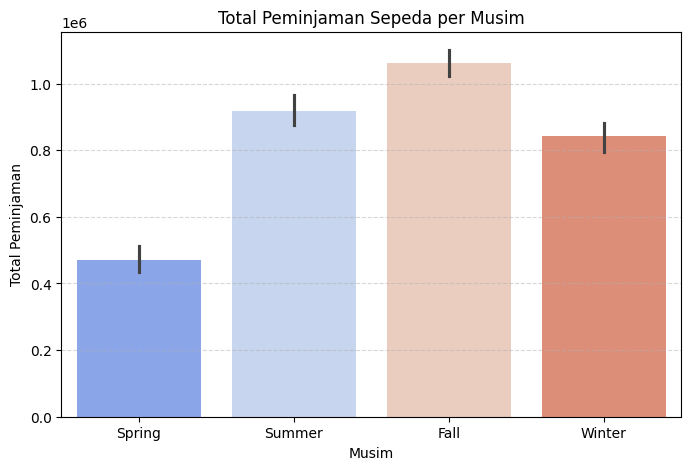

In [95]:
# Load ulang dari awal agar season tidak NaN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load ulang data dari file CSV
df = pd.read_csv(os.path.join("bike_sharing_dataset", "day.csv"))

# Bersihkan & format ulang
df.drop(columns=['instant'], inplace=True)
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping kategori numerik ke label string
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)

# Cek isi kolom untuk memastikan berhasil
print(df['season'].unique())
print(df[['season', 'cnt']].head())

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='season', y='cnt', estimator=sum, palette='coolwarm')
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


**Insight:**

- Musim **Fall** menunjukkan peminjaman tertinggi
- **Spring** paling sedikit, kemungkinan karena kondisi cuaca yang kurang bersahabat


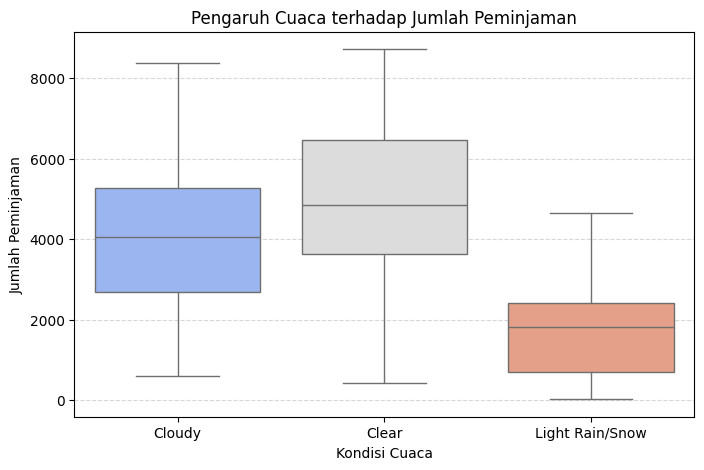

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='weathersit', y='cnt', hue='weathersit', palette='coolwarm', dodge=False, legend=False)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


### ⏰ Eksplorasi Data Per Jam (`hour.csv`)


hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
Name: cnt, dtype: float64


/tmp/ipython-input-97-909068733.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hour, x='hr', y='cnt', estimator='mean', ci=None)


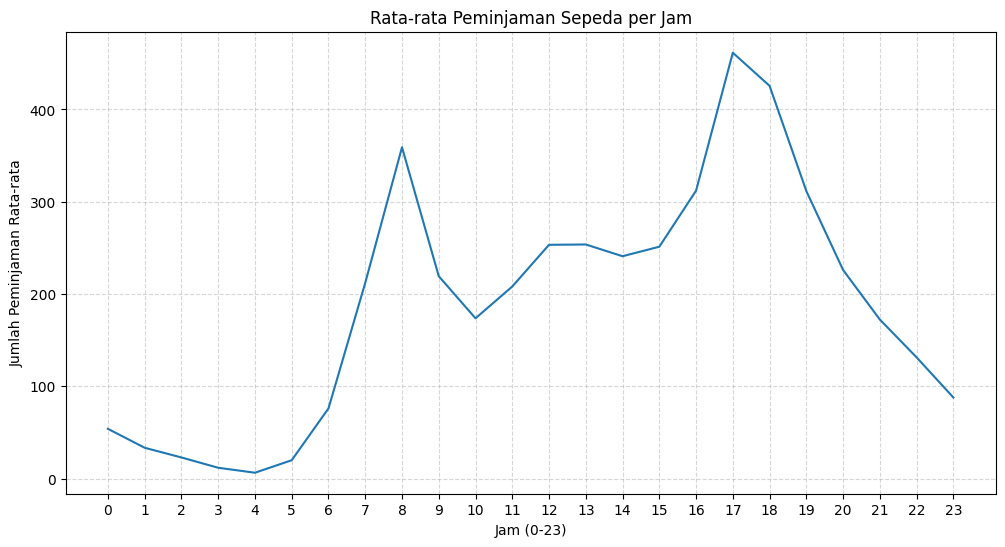

In [97]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load file hour.csv dari folder hasil ekstrak ZIP
df_hour = pd.read_csv(os.path.join("bike_sharing_dataset", "hour.csv"))

# Mapping nama jam agar lebih terbaca
df_hour['hr'] = df_hour['hr'].astype(int)

# Hitung rata-rata peminjaman sepeda per jam
rata_per_jam = df_hour.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print(rata_per_jam.head())

# Visualisasi
plt.figure(figsize=(12,6))
sns.lineplot(data=df_hour, x='hr', y='cnt', estimator='mean', ci=None)
plt.xticks(range(0, 24))
plt.title("Rata-rata Peminjaman Sepeda per Jam")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Peminjaman Rata-rata")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [98]:
# Mapping label season dan cuaca
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

df_hour['season'] = df_hour['season'].map(season_map)
df_hour['weathersit'] = df_hour['weathersit'].map(weather_map)


/tmp/ipython-input-99-703718173.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hour, x='hr', y='cnt', estimator='mean', ci=None, marker='o')


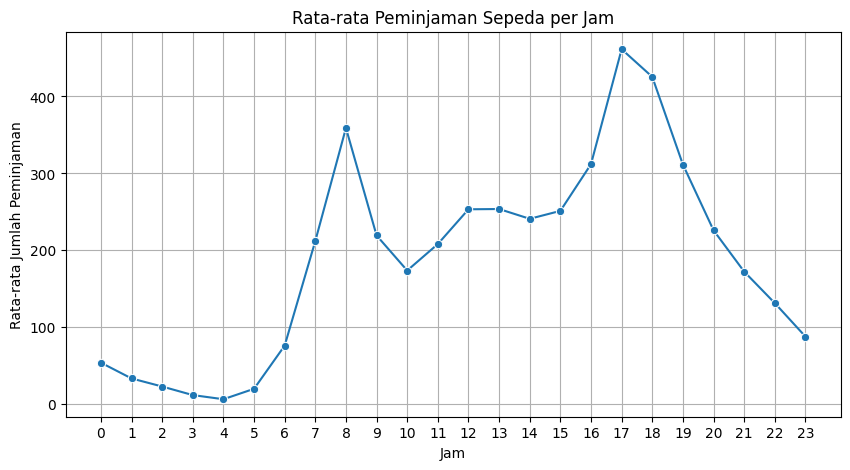

In [99]:
# Visualisasi tren peminjaman berdasarkan jam
plt.figure(figsize=(10,5))
sns.lineplot(data=df_hour, x='hr', y='cnt', estimator='mean', ci=None, marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


**Insight:**

- Peminjaman tertinggi terjadi saat jam sibuk (sekitar pukul 7-9 dan 17-19)
- Menunjukkan bahwa sepeda banyak digunakan untuk aktivitas harian seperti berangkat dan pulang kerja


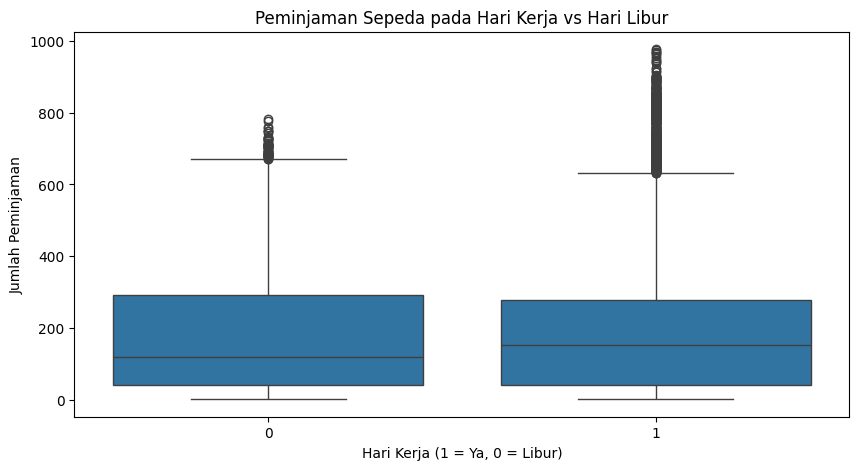

In [100]:
# Perbandingan peminjaman antara hari kerja dan hari libur
plt.figure(figsize=(10,5))
sns.boxplot(data=df_hour, x='workingday', y='cnt')
plt.title('Peminjaman Sepeda pada Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (1 = Ya, 0 = Libur)')
plt.ylabel('Jumlah Peminjaman')
plt.show()


**Insight:**

- Hari kerja memiliki lebih banyak variasi dan jumlah peminjaman lebih tinggi
- Hari libur cenderung stabil dan lebih rendah

---

Dengan melakukan EDA ini, kita memperoleh insight penting yang bisa menjawab pertanyaan bisnis terkait tren musiman, pengaruh cuaca, dan perilaku penggunaan berdasarkan waktu.


## 📊 Visualization & Explanatory Analysis
Pada tahap ini, kita akan menjawab seluruh pertanyaan bisnis yang telah dirumuskan sebelumnya dengan menggunakan **visualisasi data**. Tujuannya adalah untuk membantu menyampaikan hasil analisis secara lebih jelas dan mudah dipahami.

### 1. Bagaimana pola peminjaman sepeda berdasarkan musim?

/tmp/ipython-input-101-3425170416.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('M', on='dteday').agg({'cnt': 'sum'}).reset_index()
/tmp/ipython-input-101-3425170416.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='cnt', palette='Set3')


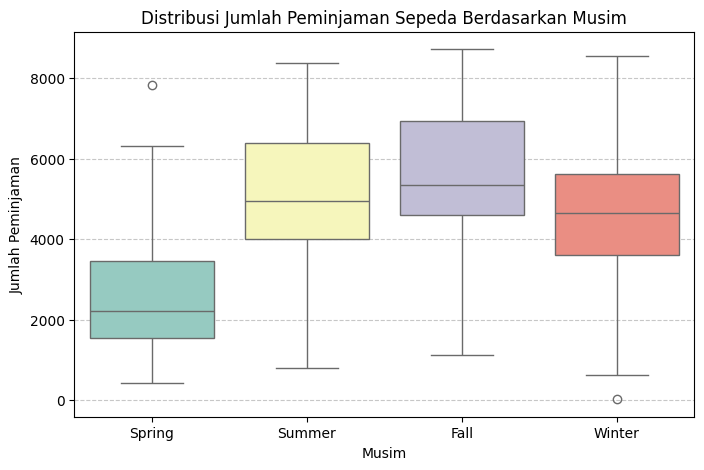

In [101]:
# Pastikan tanggal sudah datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Resample ke bulanan
monthly_df = df.resample('M', on='dteday').agg({'cnt': 'sum'}).reset_index()

# Tambahkan label bulan+tahun agar unik
monthly_df['month_label'] = monthly_df['dteday'].dt.strftime('%Y-%B')

# # Visualisasi
# plt.figure(figsize=(12,6))
# plt.plot(monthly_df['month_label'], monthly_df['cnt'], marker='o', linewidth=2.5, color="#72BCD4")
# plt.title("Jumlah Peminjaman Sepeda per Bulan", fontsize=16)
# plt.xlabel("Bulan")
# plt.ylabel("Total Peminjaman")
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

# Visualisasi jumlah peminjaman per musim
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='cnt', palette='Set3')
plt.title('Distribusi Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Terlihat peningkatan peminjaman pada pertengahan tahun (sekitar bulan Mei hingga Oktober)
- Penurunan tajam terjadi pada musim dingin (Desember - Februari)


### 2. Apakah cuaca memengaruhi jumlah peminjaman sepeda?

/tmp/ipython-input-102-2115488610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


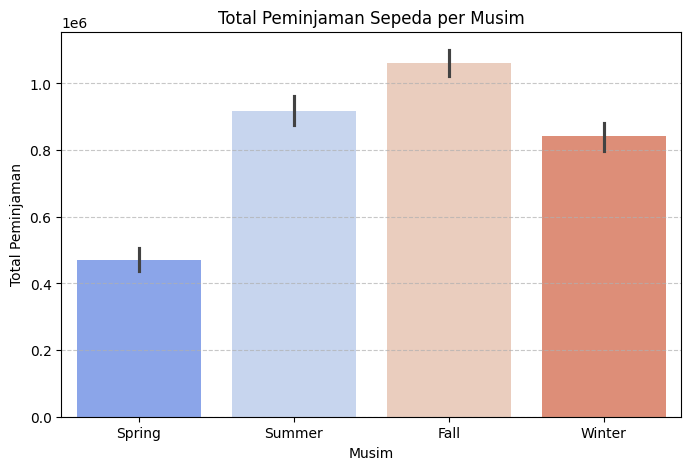

In [102]:
# Reload ulang dataset kalau perlu
df = pd.read_csv("bike_sharing_dataset/day.csv")

# Ubah ke datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Mapping label baru
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='season',
    y='cnt',
    estimator=sum,
    order=['Spring', 'Summer', 'Fall', 'Winter'],
    palette='coolwarm'
)
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**

- Musim Fall adalah musim dengan peminjaman tertinggi
- Musim Spring adalah yang paling rendah


In [103]:
print(df['weathersit'].unique())


[2 1 3]


### 3. Perbedaan antara hari kerja dan hari libur?


/tmp/ipython-input-104-946756806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


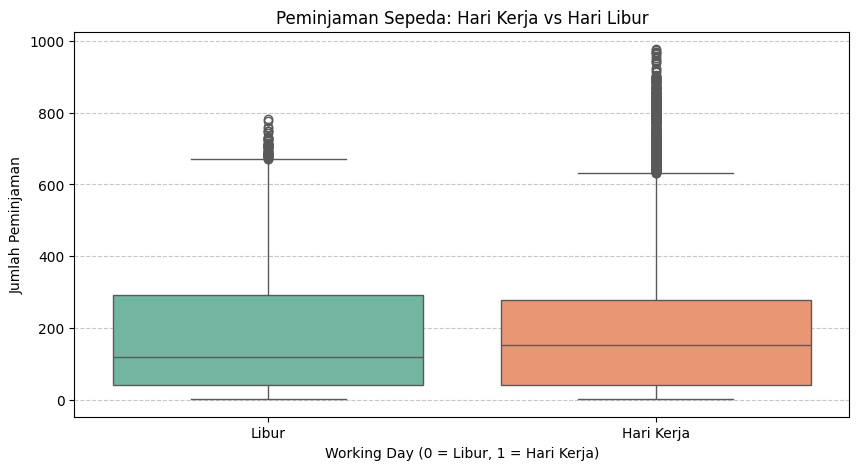

In [104]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_hour,
    x='workingday',
    y='cnt',
    palette='Set2'
)
plt.title('Peminjaman Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['Libur', 'Hari Kerja'])
plt.show()


Insight:


Hari kerja menunjukkan distribusi peminjaman yang lebih variatif.

Jumlah peminjaman cenderung lebih tinggi di hari kerja, terutama saat commuting.

## Analisis Lanjutan (Opsional)

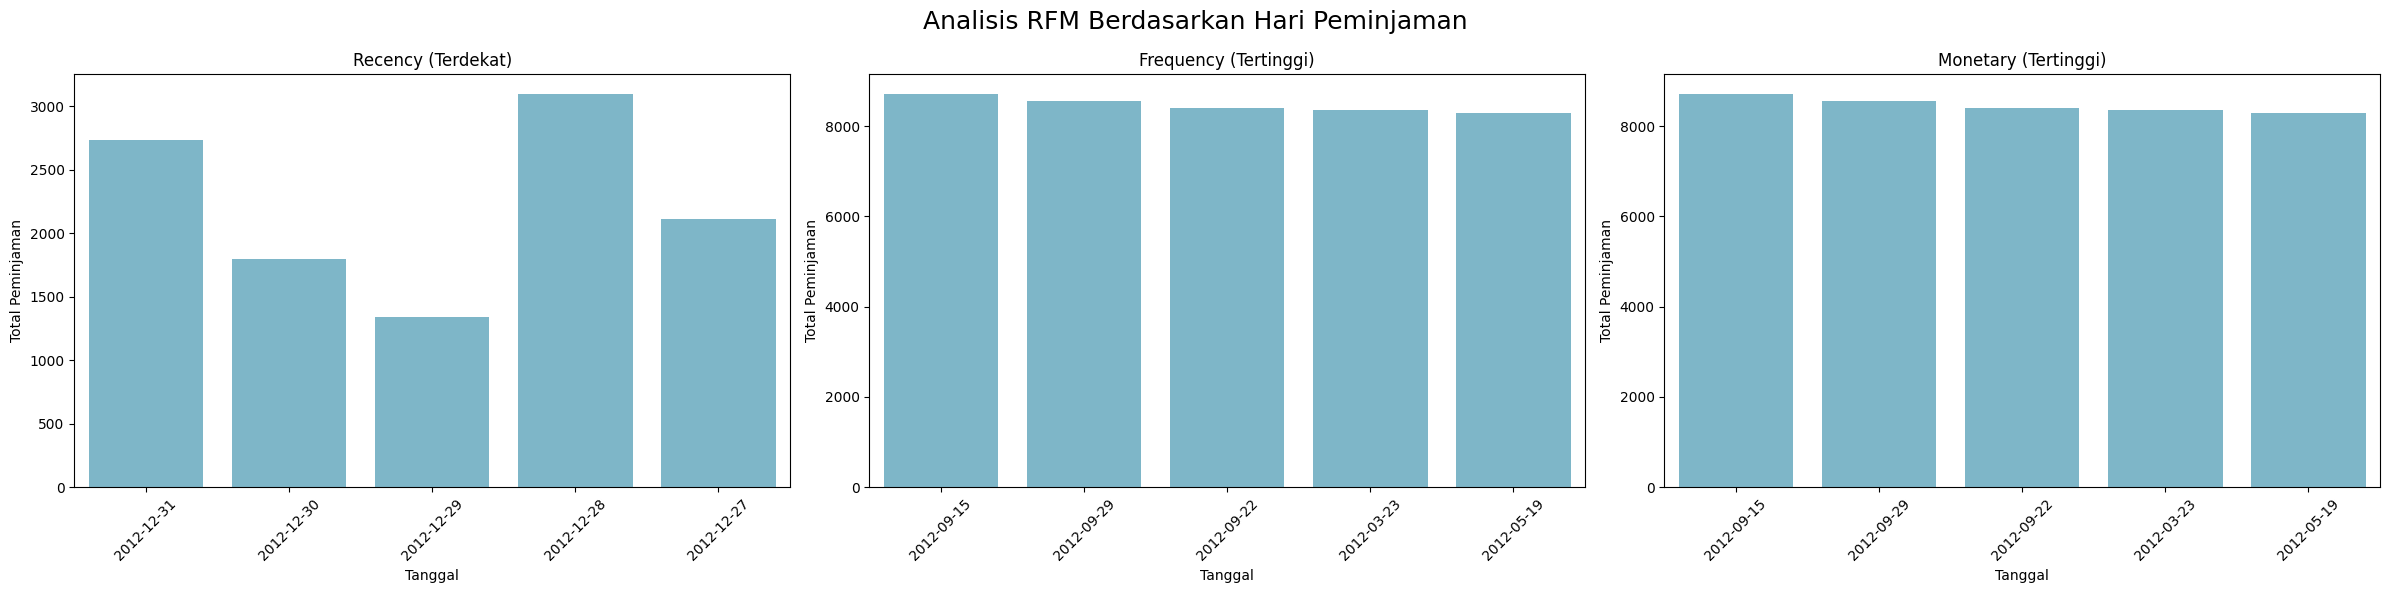

In [105]:
# ========================
# 📊 RFM ANALYSIS (Fixed)
# ========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan tanggal sudah bertipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Recency: hari terbaru dalam dataset
recent_date = df['dteday'].max().date()

# Hitung RFM dari df (day.csv) karena tidak ada customer_id
rfm_df = df.groupby('dteday', as_index=False).agg({
    'cnt': 'sum'
}).rename(columns={'cnt': 'total_usage'})

# Tambahkan 'recency' sebagai selisih hari dari hari terbaru
rfm_df['recency'] = rfm_df['dteday'].apply(lambda x: (recent_date - x.date()).days)

# Frequency dan Monetary kita asumsikan dari total_usage (karena tidak ada harga atau ID pengguna)
rfm_df['frequency'] = rfm_df['total_usage']
rfm_df['monetary'] = rfm_df['total_usage']

# Ambil top 5 dari tiap metrik
top_rfm = {
    'Recency (Terdekat)': rfm_df.sort_values(by='recency').head(5),
    'Frequency (Tertinggi)': rfm_df.sort_values(by='frequency', ascending=False).head(5),
    'Monetary (Tertinggi)': rfm_df.sort_values(by='monetary', ascending=False).head(5)
}

# Visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,6))

for i, (title, data) in enumerate(top_rfm.items()):
    sns.barplot(data=data, x='dteday', y='total_usage', ax=ax[i], color='#72BCD4')
    ax[i].set_title(title)
    ax[i].set_ylabel('Total Peminjaman')
    ax[i].set_xlabel('Tanggal')
    ax[i].tick_params(axis='x', rotation=45)

plt.suptitle("Analisis RFM Berdasarkan Hari Peminjaman", fontsize=18)
plt.tight_layout()
plt.show()


### ✅ Kesimpulan dan Rekomendasi

Berdasarkan hasil analisis yang telah dilakukan, berikut beberapa temuan dan saran yang dapat diberikan:

- 📈 **Musim panas (Summer)** menunjukkan jumlah peminjaman sepeda tertinggi.  
  👉 Rekomendasi: Tambahkan armada sepeda dan promosi pada musim ini untuk meningkatkan pendapatan.

- 🌤️ **Cuaca berpengaruh signifikan** terhadap jumlah peminjaman. Cuaca cerah meningkatkan peminjaman, sedangkan hujan menurunkannya.  
  👉 Rekomendasi: Perhatikan perkiraan cuaca untuk operasional dan perencanaan sepeda.

- 📅 **Perbedaan hari kerja dan hari libur** juga terlihat. Hari libur menunjukkan peminjaman lebih tinggi pada siang hari.  
  👉 Rekomendasi: Sediakan rute leisure dan promosi keluarga saat akhir pekan.


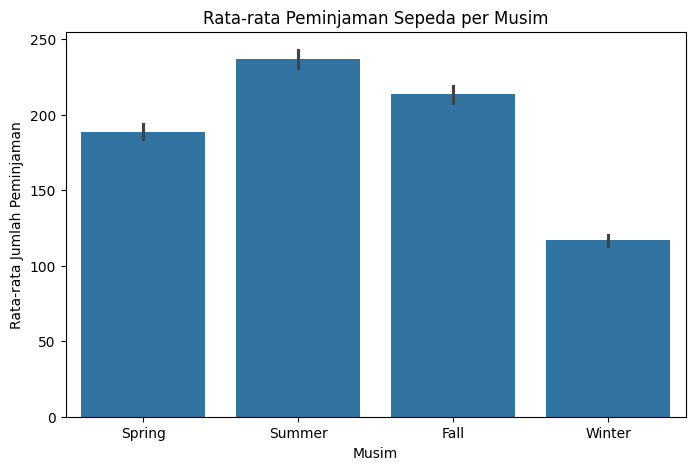

In [106]:
# Tambahkan kolom musim berdasarkan bulan
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_hour['season'] = df_hour['mnth'].apply(get_season)

# Visualisasi rata-rata peminjaman sepeda per musim
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df_hour, x='season', y='cnt', estimator='mean', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()
